# Complex System Simulation: Corals and Flows
#### _Group 12: Esther Bakels (12362980), Loes Bijman (15211312), Aleksandar Jacimovic (), Boyan Mihaylov (15067602)_

## 1. Imports / Preliminaries

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import vis_tools as vt
import dla_model as dm
import cs_measures as cm
from importlib import reload

## 2. Flow Functions

In [5]:
# Reload modules
reload(vt)
reload(dm)

<module 'dla_model' from 'd:\\GitHub\\complex-system-simulation\\Project\\Code\\dla_model.py'>

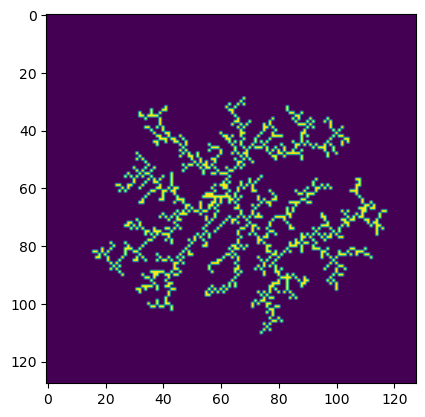

In [92]:
# Time / space parameters
size = 128
steps = 1000

# Initialize lattice
seeds = np.array([(int(size*0.5), int(size*0.5))])
lattice = dm.init_lattice(size, seeds)

# Initialize particles
particle_density = 0.1
particles = dm.init_particles(lattice, particle_density)

# Arrays for storing time frames
lattice_frames = np.empty((steps, size, size))
particles_frames = np.empty_like(lattice_frames)

current_lattice = np.array(lattice)
current_particles = np.array(particles)
for step in range(steps):
    
    # Record current state
    lattice_frames[step] = np.array(current_lattice)
    particles_frames[step] = dm.particles_to_lattice(current_particles, size)

    # Move particles
    current_particles = dm.move_particles_diffuse(current_particles, current_lattice, periodic=(False, True), moore=True)

    # Aggregate particles
    current_lattice, current_particles = dm.aggregate_particles(current_particles, current_lattice, None, periodic=(False, True), moore=True)
    # print(f"step {step}: {current_lattice}")

vt.animate_lattice_2D(lattice_frames, interval=10)

## 3. Fractal Dimension

In [124]:
# Reload module
reload(cm)
reload(vt)

<module 'vis_tools' from 'd:\\GitHub\\complex-system-simulation\\Project\\Code\\vis_tools.py'>

128
[1.38003861 0.59044788]
[2.         1.79248125 1.65139877 1.65367746 1.6258566  1.55440491
 1.42776478]


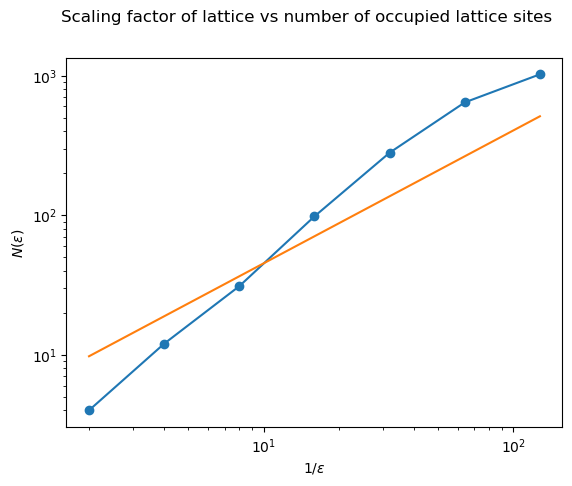

In [125]:
print(current_lattice.shape[0])
fractal_dims, n_boxes, scales_inverse, coeffs = cm.fractal_dimension(current_lattice)

print(fractal_dims)

vt.plot_fractal_dimension(scales_inverse, n_boxes, coeffs)